<a href="https://colab.research.google.com/github/Om-Tiwari/MNIST-MLP/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network To Classify Handwritten Numbers**

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [27]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [28]:
#normalize: 0,255 --> 0,1
X_train, X_test = X_train/255.0, X_test/255.0

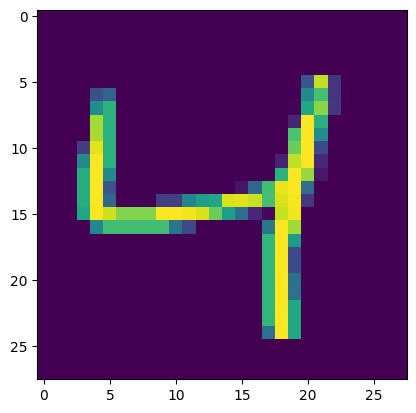

In [29]:
plt.imshow(X_train[2])

In [30]:
model =  keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
#losses and optimizers
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
#training

history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)


Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1975 - val_accuracy: 0.9707
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.1538 - val_accuracy: 0.9768
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1631 - val_accuracy: 0.9771
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.1724 - val_accuracy: 0.9762
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.1823 - val_accuracy: 0.9747
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.1853 - val_accuracy: 0.9751
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.1638 - val_accuracy:

In [34]:
#evaluation
model.evaluate(X_test,y_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9778


[0.20089556276798248, 0.9778000116348267]

In [35]:
#predictions
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_pred[:10]

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [36]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

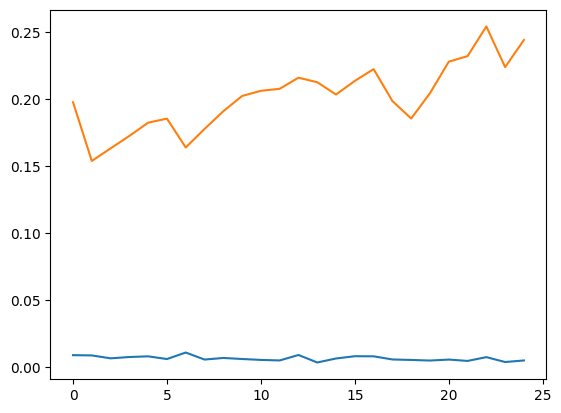

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

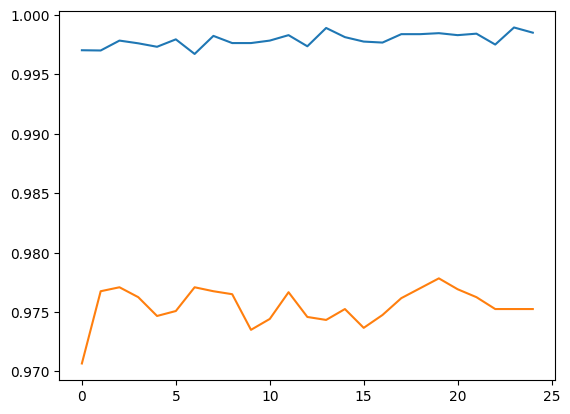

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])